**Objective:** Create a restaurant recommendation
system based on user preferences.

**Steps:**
* Preprocess the dataset by handling missing
values and encoding categorical variables.
* Determine the criteria for restaurant
recommendations (e.g., cuisine preference,
price range).
* Implement a content-based filtering
approach where users are recommended
restaurants similar to their preferred criteria.
* Test the recommendation system by
providing sample user preferences and
evaluating the quality of recommendations.

###Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Data Loading and Preprocessing

In [32]:
# load dataframe
df = pd.read_csv("C:/Users/DELL/Desktop/cognifyz/Task-2/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
# Create a refined DataFrame
refined_df = df[['Restaurant ID', 'Restaurant Name', 'Cuisines', 'Price range', 'Aggregate rating', 'Votes']]
refined_df

,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",3,4.8,314
1,6304287,Izakaya Kikufuji,Japanese,3,4.5,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4,4.4,270
3,6318506,Ooma,"Japanese, Sushi",4,4.9,365
4,6314302,Sambo Kojin,"Japanese, Korean",4,4.8,229
...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Turkish,3,4.1,788
9547,5908749,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",3,4.2,1034
9548,5915807,Huqqa,"Italian, World Cuisine",4,3.7,661
9549,5916112,A���k Kahve,Restaurant Cafe,4,4.0,901


In [7]:
#handle missing values
refined_df.isna().sum()

Restaurant ID       0
Restaurant Name     0
Cuisines            9
Price range         0
Aggregate rating    0
Votes               0
dtype: int64

In [8]:
refined_df = refined_df.dropna()
refined_df.isna().sum()

Restaurant ID       0
Restaurant Name     0
Cuisines            0
Price range         0
Aggregate rating    0
Votes               0
dtype: int64

In [9]:
refined_df.duplicated().sum()

0

In [10]:
refined_df['Restaurant Name'].duplicated().sum()

2105

In [11]:
refined_df['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: count, Length: 7437, dtype: int64

In [12]:
# Sorting the refined DataFrame by 'Restaurant Name' and 'Aggregate rating' in descending order
refined_df = refined_df.sort_values(by=['Restaurant Name', 'Aggregate rating'], ascending=[True, False])
refined_df.head()


,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes
2459,3100446,#45,Cafe,2,3.6,209
9148,18378803,#Dilliwaala6,North Indian,3,3.7,124
2613,18311951,#InstaFreeze,Ice Cream,1,0.0,2
6998,18336489,#OFF Campus,"Cafe, Continental, Italian, Fast Food",2,3.7,216
8692,18317511,#Urban Caf��,"North Indian, Chinese, Italian",2,3.3,49


In [11]:
dfR[dfR["Restaurant Name"]=="Cafe Coffee Day"].head()

,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes
6430,5595,Cafe Coffee Day,Cafe,1,3.6,58
8432,594,Cafe Coffee Day,Cafe,1,3.6,125
3946,305736,Cafe Coffee Day,Cafe,1,3.5,35
5877,8828,Cafe Coffee Day,Cafe,1,3.5,50
3001,596,Cafe Coffee Day,Cafe,1,3.4,277


In [15]:
#removing duplicate entries of same restaurant name
refined_df = refined_df.drop_duplicates('Restaurant Name',keep='first')
refined_df

,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes
2459,3100446,#45,Cafe,2,3.6,209
9148,18378803,#Dilliwaala6,North Indian,3,3.7,124
2613,18311951,#InstaFreeze,Ice Cream,1,0.0,2
6998,18336489,#OFF Campus,"Cafe, Continental, Italian, Fast Food",2,3.7,216
8692,18317511,#Urban Caf��,"North Indian, Chinese, Italian",2,3.3,49
...,...,...,...,...,...,...
4659,18361747,t Lounge by Dilmah,"Cafe, Tea, Desserts",2,3.6,34
9454,6401789,tashas,"Cafe, Mediterranean",4,4.1,374
9334,7100938,wagamama,"Japanese, Asian",4,3.7,131
3120,18222559,{Niche} - Cafe & Bar,"North Indian, Chinese, Italian, Continental",3,4.1,492


In [16]:
refined_df['Restaurant Name'].value_counts()

Restaurant Name
#45                     1
Pizza Hut Delivery      1
PizzaExpress            1
Pizza ��l Forno         1
Pizza �� Bessa          1
                       ..
Free Spirit             1
Freakin Beans           1
Fratini La Trattoria    1
Frasers                 1
�ukura��a Sofras۱       1
Name: count, Length: 7437, dtype: int64

In [17]:
# Filtering the refined DataFrame to include only rows where 'Aggregate rating' is greater than 3.9
refined_df = refined_df[refined_df['Aggregate rating'] > 3.9]
refined_df


,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes
351,17057397,'Ohana,Hawaiian,3,4.5,1151
751,2600031,10 Downing Street,"North Indian, Chinese",3,4.0,257
2292,2100784,11th Avenue Cafe Bistro,"Cafe, American, Italian, Continental",2,4.1,377
2484,18233317,145 Kala Ghoda,"Fast Food, Beverages, Desserts",3,4.2,1606
1468,18408054,19 Flavours Biryani,"Mughlai, Hyderabadi",2,4.1,84
...,...,...,...,...,...,...
1837,18418247,feel ALIVE,"North Indian, American, Asian, Biryani",3,4.7,69
9385,6113857,sketch Gallery,"British, Contemporary",4,4.5,148
9454,6401789,tashas,"Cafe, Mediterranean",4,4.1,374
3120,18222559,{Niche} - Cafe & Bar,"North Indian, Chinese, Italian, Continental",3,4.1,492


In [18]:
# Splitting the 'Cuisines' column into lists
refined_df['Cuisines'] = refined_df['Cuisines'].str.split(', ')
refined_df


C:\Users\DELL\AppData\Local\Temp\ipykernel_24156\2520100826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_df['Cuisines'] = refined_df['Cuisines'].str.split(', ')


,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes
351,17057397,'Ohana,[Hawaiian],3,4.5,1151
751,2600031,10 Downing Street,"[North Indian, Chinese]",3,4.0,257
2292,2100784,11th Avenue Cafe Bistro,"[Cafe, American, Italian, Continental]",2,4.1,377
2484,18233317,145 Kala Ghoda,"[Fast Food, Beverages, Desserts]",3,4.2,1606
1468,18408054,19 Flavours Biryani,"[Mughlai, Hyderabadi]",2,4.1,84
...,...,...,...,...,...,...
1837,18418247,feel ALIVE,"[North Indian, American, Asian, Biryani]",3,4.7,69
9385,6113857,sketch Gallery,"[British, Contemporary]",4,4.5,148
9454,6401789,tashas,"[Cafe, Mediterranean]",4,4.1,374
3120,18222559,{Niche} - Cafe & Bar,"[North Indian, Chinese, Italian, Continental]",3,4.1,492


In [19]:
# Exploding the 'Cuisines' column to create separate rows for each cuisine
refined_df = refined_df.explode('Cuisines')
refined_df


,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes
351,17057397,'Ohana,Hawaiian,3,4.5,1151
751,2600031,10 Downing Street,North Indian,3,4.0,257
751,2600031,10 Downing Street,Chinese,3,4.0,257
2292,2100784,11th Avenue Cafe Bistro,Cafe,2,4.1,377
2292,2100784,11th Avenue Cafe Bistro,American,2,4.1,377
...,...,...,...,...,...,...
3120,18222559,{Niche} - Cafe & Bar,Chinese,3,4.1,492
3120,18222559,{Niche} - Cafe & Bar,Italian,3,4.1,492
3120,18222559,{Niche} - Cafe & Bar,Continental,3,4.1,492
9523,6000871,�ukura��a Sofras۱,Kebab,3,4.4,296


In [20]:
# Counting the occurrences of each cuisine
cuisine_counts = refined_df['Cuisines'].value_counts()
cuisine_counts


Cuisines
North Indian    270
Italian         237
Chinese         200
Continental     199
Cafe            177
               ... 
Bubble Tea        1
Mangalorean       1
Cuban             1
New American      1
D�_ner            1
Name: count, Length: 128, dtype: int64

In [22]:
restoXcuisines = pd.crosstab(refined_df['Restaurant Name'], refined_df['Cuisines'])

In [23]:
restoXcuisines

Cuisines,Afghani,African,American,Andhra,Arabian,Argentine,Asian,Asian Fusion,Australian,Awadhi,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
Restaurant Name,,,,,,,,,,,,,,,,,,,,,
'Ohana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Downing Street,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11th Avenue Cafe Bistro,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145 Kala Ghoda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19 Flavours Biryani,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feel ALIVE,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sketch Gallery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tashas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
refined_df['Restaurant Name'].sample(20, random_state=194)

660                       Nini's Kitchen
782                           JUGAAD JN.
7037                     Eat Golf Repeat
9308    Eden Noodles Cafe �__·�_��_��_��
3259                      Defence Bakery
2295                     The Corner Cafe
9276              Noah's Barn Coffeenery
3695                                Druk
514                         The Refinery
842                                 Yari
2116                            Udaipuri
9518              Hattena Hatay  Sofras۱
186               Berry Patch Restaurant
9282                          Union Deli
9547                        Ceviz A��ac۱
3114                       The G.T. Road
9492                     Licorish Bistro
9163                    Saut��ed Stories
6997                 Echoes Satyaniketan
1860                             Djinggs
Name: Restaurant Name, dtype: object

In [25]:
from sklearn.metrics import jaccard_score

In [26]:
print(jaccard_score(restoXcuisines.loc["Olive Bistro"].values,
                    restoXcuisines.loc["Rose Cafe"].values))

0.3333333333333333


In [27]:
from scipy.spatial.distance import pdist, squareform

In [28]:
from scipy.spatial.distance import pdist, squareform
import pandas as pd

# Compute Jaccard distance between restaurants based on cuisines
jaccardDist = pdist(restoXcuisines.values, metric='jaccard')

# Convert the Jaccard distance into a similarity matrix
jaccardMatrix = squareform(1 - jaccardDist)

# Create DataFrame from the similarity matrix with restaurant indices as columns and rows
dfJaccard = pd.DataFrame(jaccardMatrix, index=restoXcuisines.index, columns=restoXcuisines.index)

dfJaccard


Restaurant Name,'Ohana,10 Downing Street,11th Avenue Cafe Bistro,145 Kala Ghoda,19 Flavours Biryani,1918 Bistro & Grill,2 Dog,22nd Parallel,3 Wise Monkeys,38 Barracks,...,Zoeys Pizzeria,Zolocrust - Hotel Clarks Amer,Zombie Burger + Drink Lab,Zuka Choco-la,Zunzi's,feel ALIVE,sketch Gallery,tashas,{Niche} - Cafe & Bar,�ukura��a Sofras۱
Restaurant Name,,,,,,,,,,,,,,,,,,,,,
'Ohana,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0
10 Downing Street,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.200000,...,0.0,0.0,0.0,0.000000,0.00,0.200000,0.0,0.0,0.500000,0.0
11th Avenue Cafe Bistro,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.333333,...,0.0,0.4,0.0,0.000000,0.00,0.142857,0.0,0.2,0.333333,0.0
145 Kala Ghoda,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.2,0.333333,0.00,0.000000,0.0,0.0,0.000000,0.0
19 Flavours Biryani,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feel ALIVE,0.0,0.2,0.142857,0.0,0.0,0.0,0.166667,0.0,0.0,0.600000,...,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.142857,0.0
sketch Gallery,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0
tashas,0.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.25,0.000000,0.0,0.0,0.000000,0.0


In [25]:
dfR['Restaurant Name'].sample(20)

6848          Rajinder Da Dhaba
2538    Moksh The Restro Lounge
9451                    Jarryds
9406            Home Sweet Home
4669                   Parallel
9485                The Whippet
4                   Sambo Kojin
248             Texas Roadhouse
2310                  Mocha Bar
2293             Caf�� Riverrun
426                  Hula Grill
2417                  What's Up
121                Trappeze Pub
7192               Asia Central
8601                  Bistro 37
1839                  Prankster
839             Sree Annapoorna
1164                     Zambar
3693                    Depot48
567              Sofra Istanbul
Name: Restaurant Name, dtype: object

###Final Recommendation System
(use algos like RF for user input recommendation.. here it is just static rigid output)

In [29]:
# Selecting the similarity scores for the restaurant 'Ooma' and sorting them in descending order
sim = dfJaccard.loc['Ooma'].sort_values(ascending=False)

# Creating a DataFrame with the restaurant names and their similarity scores
sim = pd.DataFrame({'Restaurant Name': sim.index, 'simScore': sim.values})

# Filtering similar restaurants based on conditions: not the same restaurant, similarity score >= 0.7
sim = sim[(sim['Restaurant Name'] != 'Ooma') & (sim['simScore'] >= 0.7)].head(5)

# Merging with refined DataFrame to get aggregate ratings of recommended restaurants
RestoRec = pd.merge(sim, dfR[['Restaurant Name', 'Aggregate rating']], how='inner', on='Restaurant Name')

# Sorting recommended restaurants by aggregate rating in descending order and removing duplicates
FinalRestoRec = RestoRec.sort_values('Aggregate rating', ascending=False).drop_duplicates('Restaurant Name', keep='first')

FinalRestoRec


,Restaurant Name,simScore,Aggregate rating
0,Sushi Masa,1.0,4.9
3,Roka,1.0,4.6
2,Nobu,1.0,4.4
1,Ichiban,1.0,4.3
4,Guppy,1.0,4.1


In [30]:
FinalRestoRec

,Restaurant Name,simScore,Aggregate rating
0,Sushi Masa,1.0,4.9
3,Roka,1.0,4.6
2,Nobu,1.0,4.4
1,Ichiban,1.0,4.3
4,Guppy,1.0,4.1


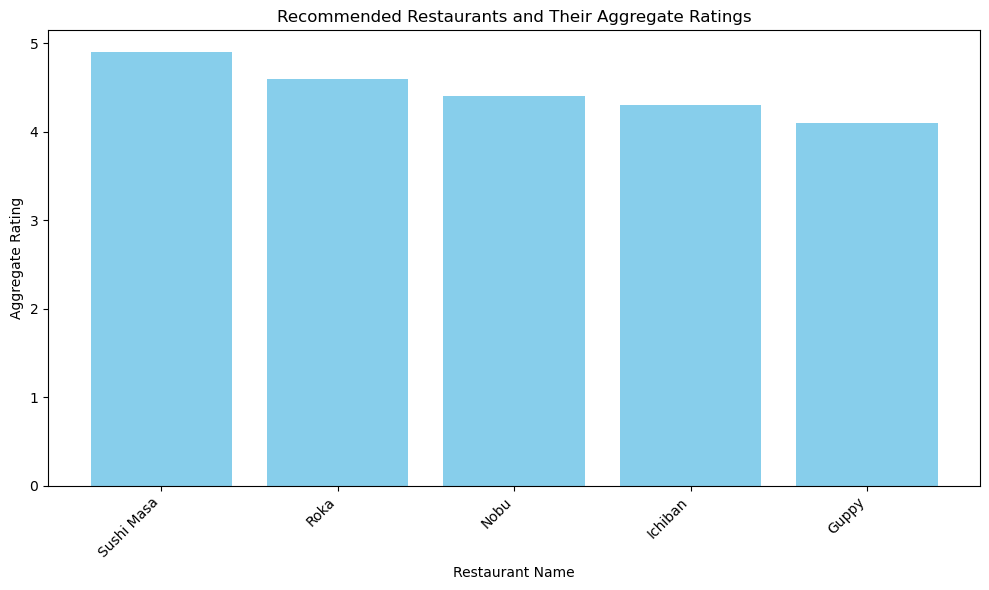

In [31]:
import matplotlib.pyplot as plt

# Create a bar graph for recommended restaurants and their aggregate ratings
plt.figure(figsize=(10, 6))
plt.bar(FinalRestoRec['Restaurant Name'], FinalRestoRec['Aggregate rating'], color='skyblue')
plt.xlabel('Restaurant Name')
plt.ylabel('Aggregate Rating')
plt.title('Recommended Restaurants and Their Aggregate Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
